In [ ]:
import pandas as pd
import numpy as np

preprocessing

In [ ]:
transactions_df = pd.read_excel('/content/transactions_clean.xlsx')
print(transactions_df.head())
transactions_df.info()




   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25             0   
1               2           3         3120       2017-05-21             1   
2               3          37          402       2017-10-16             0   
3               4          88         3135       2017-08-31             0   
4               5          78          787       2017-10-01             1   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  day  month  year  
0       71.49     

In [ ]:
transactions_df = transactions_df [transactions_df ['order_status'] != 'cancelled']

In [ ]:
transactions_df['product_class'].replace(['low','medium', 'large'] ,  [1,2,3], inplace=True)
transactions_df['product_size'].replace(['low','medium', 'large'] ,  [1,2,3], inplace=True)

<ipython-input-5-a893012ca757>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions_df['product_class'].replace(['low','medium', 'large'] ,  [1,2,3], inplace=True)
<ipython-input-5-a893012ca757>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# --- Brand ---
# 1. Initialize OneHotEncoder
brand_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 2. Fit and transform on 'brand' column
brand_encoded = brand_encoder.fit_transform(transactions_df[['brand']])

# 3. Get feature names and create DataFrame
brand_feature_names = brand_encoder.get_feature_names_out(['brand'])
brand_encoded_df = pd.DataFrame(brand_encoded, columns=brand_feature_names)


# --- Product Line ---
# 1. Initialize OneHotEncoder
product_line_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 2. Fit and transform on 'product_line' column
product_line_encoded = product_line_encoder.fit_transform(transactions_df[['product_line']])

# 3. Get feature names and create DataFrame
product_line_feature_names = product_line_encoder.get_feature_names_out(['product_line'])
product_line_encoded_df = pd.DataFrame(product_line_encoded, columns=product_line_feature_names)


# --- Concatenate and Clean Up ---
transactions_df = pd.concat([transactions_df, brand_encoded_df, product_line_encoded_df], axis=1)
transactions_df.drop(['brand', 'product_line'], axis=1, inplace=True)

In [ ]:
transactions_df['profit'] = transactions_df['list_price'] - transactions_df['standard_cost']

In [ ]:
transactions_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'product_class', 'product_size',
       'list_price', 'standard_cost', 'product_first_sold_date', 'day',
       'month', 'year', 'brand_Giant Bicycles', 'brand_Norco Bicycles',
       'brand_OHM Cycles', 'brand_Solex', 'brand_Trek Bicycles',
       'brand_WeareA2B', 'product_line_Mountain', 'product_line_Road',
       'product_line_Standard', 'product_line_Touring', 'profit'],
      dtype='object')

In [ ]:
customerdemographic_df = pd.read_excel('/content/customerdemographic_clean.xlsx')
print(customerdemographic_df.head())
customerdemographic_df.info()

   customer_id          customer_name  gender  \
0            1      Laraine Medendorp  Female   
1            2            Eli Bockman    Male   
2            3           Arlin Dearle    Male   
3            4                unknown    Male   
4            5  Sheila-kathryn Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                 unknown   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator owns_car  \
0                Health      Mass Customer                  N      Yes   
1    Financial Services      Mass Customer                  N      Yes   
2              Prope

In [ ]:
customerdemographic_df['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [ ]:
customerdemographic_df['gender'].replace(['Female','Male'] , [1, 0], inplace=True)
customerdemographic_df['deceased_indicator'].replace(['Y','N'] , [1, 0], inplace=True)
customerdemographic_df['owns_car'].replace(['Yes','No'] , [1, 0], inplace=True)
customerdemographic_df['wealth_segment'].replace(['Mass Customer', 'Affluent Customer', 'High Net Worth'] , [1, 2,3], inplace=True)

<ipython-input-11-69f73d0d8d37>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customerdemographic_df['gender'].replace(['Female','Male'] , [1, 0], inplace=True)
<ipython-input-11-69f73d0d8d37>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customerdemographic_df['gender'].replace(['Female','Mal

In [ ]:
# 1. Initialize OneHotEncoder
job_industry_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 2. Fit and transform on 'job_industry_category'
job_industry_encoded = job_industry_encoder.fit_transform(customerdemographic_df[['job_industry_category']])

# 3. Get feature names (job_industry_category values) and create DataFrame
job_industry_feature_names = job_industry_encoder.get_feature_names_out(['job_industry_category'])
job_industry_encoded_df = pd.DataFrame(job_industry_encoded, columns=job_industry_feature_names)

# 4. Concatenate and Clean Up
customerdemographic_df = pd.concat([customerdemographic_df, job_industry_encoded_df], axis=1)

In [ ]:
customerdemographic_df.head()

,customer_id,customer_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_unknown
0,1,Laraine Medendorp,1,93,1953-10-12,Executive Secretary,Health,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Eli Bockman,0,81,1980-12-16,Administrative Officer,Financial Services,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Arlin Dearle,0,61,1954-01-20,Recruiting Manager,Property,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,unknown,0,33,1961-10-03,unknown,IT,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,Sheila-kathryn Calton,1,56,1977-05-13,Senior Editor,unknown,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Assuming your DataFrames are called transactions_df and customerdemographic_df
merged_df = pd.merge(transactions_df, customerdemographic_df, on='customer_id', how='inner')
merged_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_class,product_size,list_price,standard_cost,...,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_unknown
0,1,2,2950,2017-02-25,0,Approved,2,2,71.49,53.62,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3,3120,2017-05-21,1,Approved,2,3,2091.47,388.92,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,37,402,2017-10-16,0,Approved,1,2,1793.43,248.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,88,3135,2017-08-31,0,Approved,2,2,1198.46,381.10,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,78,787,2017-10-01,1,Approved,2,3,1765.30,709.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
merged_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'product_class', 'product_size',
       'list_price', 'standard_cost', 'product_first_sold_date', 'day',
       'month', 'year', 'brand_Giant Bicycles', 'brand_Norco Bicycles',
       'brand_OHM Cycles', 'brand_Solex', 'brand_Trek Bicycles',
       'brand_WeareA2B', 'product_line_Mountain', 'product_line_Road',
       'product_line_Standard', 'product_line_Touring', 'profit',
       'customer_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'customer_age',
       'job_industry_category_Argiculture',
       'job_industry_category_Entertainment',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Manufacturing', 'job_industry_category_Property',
       'jo

selecteing features

In [ ]:
features_df = merged_df[['product_class', 'product_size',
       'list_price', 'standard_cost', 'product_first_sold_date', 'day',
       'month','brand_Giant Bicycles', 'brand_Norco Bicycles',
       'brand_OHM Cycles', 'brand_Solex', 'brand_Trek Bicycles',
       'brand_WeareA2B', 'product_line_Mountain', 'product_line_Road',
       'product_line_Standard', 'product_line_Touring', 'profit','past_3_years_bike_related_purchases',
       'wealth_segment', 'owns_car', 'tenure', 'customer_age',
       'job_industry_category_Argiculture',
       'job_industry_category_Entertainment',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Manufacturing', 'job_industry_category_Property',
       'job_industry_category_Retail',
       'job_industry_category_Telecommunications',
        ]]

In [ ]:
features_df = features_df.apply(pd.to_numeric, errors='coerce')
features_df = features_df.dropna()


In [ ]:
features_df.columns

Index(['product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'day', 'month', 'brand_Giant Bicycles',
       'brand_Norco Bicycles', 'brand_OHM Cycles', 'brand_Solex',
       'brand_Trek Bicycles', 'brand_WeareA2B', 'product_line_Mountain',
       'product_line_Road', 'product_line_Standard', 'product_line_Touring',
       'profit', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'customer_age',
       'job_industry_category_Argiculture',
       'job_industry_category_Entertainment',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Manufacturing', 'job_industry_category_Property',
       'job_industry_category_Retail',
       'job_industry_category_Telecommunications'],
      dtype='object')

Modling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Select features and target variables
features = ['product_class', 'product_size', 'product_first_sold_date',
       'day', 'month', 'brand_Giant Bicycles','profit',
       'brand_Norco Bicycles', 'brand_OHM Cycles', 'brand_Solex',
       'brand_Trek Bicycles', 'brand_WeareA2B', 'product_line_Mountain',
       'product_line_Road', 'product_line_Standard', 'product_line_Touring',
       'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'customer_age']
predicted_cost = ['standard_cost']

X = features_df[features]
y = features_df[predicted_cost]
# Dictionary to store accuracy scores
accuracy_scores = {
    'Linear Regression': [],
    'Random Forest': []
}

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)

# Train models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)



# Calculate and store accuracy scores (R-squared)
accuracy_scores['Linear Regression'].append(r2_score(y_test, linear_predictions))
accuracy_scores['Random Forest'].append(r2_score(y_test, random_forest_predictions))
accuracy_scores['Linear Regression'].append(mean_squared_error(y_test, linear_predictions))
accuracy_scores['Random Forest'].append(mean_squared_error(y_test, random_forest_predictions))

# Print accuracy scores
print(accuracy_scores)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'Linear Regression': [0.20772997015242334, 63463.32830438401], 'Random Forest': [0.9998255100415782, 13.977196031605605]}


In [ ]:
import pickle
with open('predicted_cost.sav', 'wb') as file:
  pickle.dump(random_forest_predictions, file)

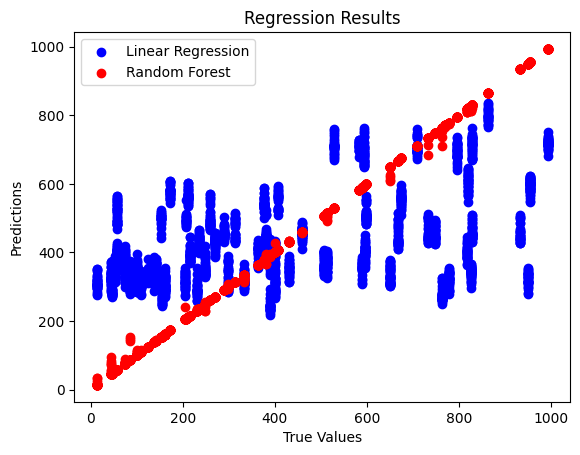

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, linear_predictions, c='blue', label='Linear Regression')
plt.scatter(y_test, random_forest_predictions, c='red', label='Random Forest')

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Regression Results")
plt.legend()
plt.show()

In [ ]:
predicted_cost = pd.DataFrame(random_forest_predictions, columns=['Predicted_Standard_Cost'])
predicted_cost.to_csv('predicted_cost.csv', index=False)


In [ ]:
# Create a DataFrame from predictions
predictions_cost_df = pd.DataFrame({'predicted_list_price': random_forest_predictions})

# Concatenate predictions with features used for prediction
predictions_cost_df = pd.concat([X_test.reset_index(drop=True), predictions_cost_df], axis=1)

# Save the DataFrame to a CSV file
predictions_cost_df.to_csv('cost_predictions.csv', index=False)

In [ ]:
# Select features and target variables
features = ['product_class', 'product_size', 'product_first_sold_date',
       'day', 'month', 'brand_Giant Bicycles','profit',
       'brand_Norco Bicycles', 'brand_OHM Cycles', 'brand_Solex',
       'brand_Trek Bicycles', 'brand_WeareA2B', 'product_line_Mountain',
       'product_line_Road', 'product_line_Standard', 'product_line_Touring',
       'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'customer_age']
predicted_price =  ['list_price']

X = features_df[features]
y = features_df[predicted_price]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)

# Train models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Dictionary to store accuracy scores
accuracy_scores = {
    'Linear Regression': [],
    'Random Forest': []
}

# Calculate and store accuracy scores (R-squared)
accuracy_scores['Linear Regression'].append(r2_score(y_test, linear_predictions))
accuracy_scores['Random Forest'].append(r2_score(y_test, random_forest_predictions))
accuracy_scores['Linear Regression'].append(mean_squared_error(y_test, linear_predictions))
accuracy_scores['Random Forest'].append(mean_squared_error(y_test, random_forest_predictions))

# Print accuracy scores
print(accuracy_scores)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'Linear Regression': [0.8158296989446303, 63463.328304383926], 'Random Forest': [0.9999999159641466, 0.028957953185618005]}


In [ ]:
with open('predicted_price.sav', 'wb') as file:
  pickle.dump(random_forest_predictions, file)

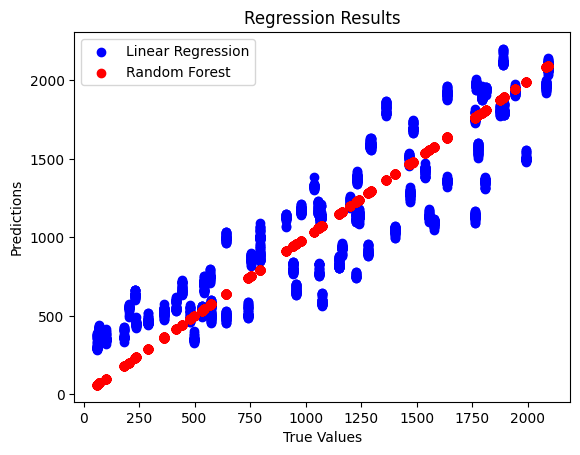

In [ ]:
plt.scatter(y_test, linear_predictions, c='blue', label='Linear Regression')
plt.scatter(y_test, random_forest_predictions, c='red', label='Random Forest')

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Regression Results")
plt.legend()
plt.show()

In [ ]:
predicted_price = pd.DataFrame(random_forest_predictions, columns=['Predicted_List_Price'])
predicted_price.to_csv('predicted_price.csv', index=False)


In [ ]:
# Create a DataFrame from predictions
predictions_price_df = pd.DataFrame({'predicted_list_price': random_forest_predictions})

# Concatenate predictions with features used for prediction
predictions_price_df = pd.concat([X_test.reset_index(drop=True), predictions_price_df], axis=1)

# Save the DataFrame to a CSV file
predictions_price_df.to_csv('price_predictions.csv', index=False)